In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Airbnb.csv')
df.head(3)

C:\Users\janvi\AppData\Local\Temp\ipykernel_23084\1172785274.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [7]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [9]:
# house_rules and license has highly missing values and we don't use to analyse in our project so we can drop that columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [11]:
# last review type change into date-time format
df["last review"] = pd.to_datetime(df["last review"], errors='coerce')

In [12]:
df.dtypes

id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                     object
service fee                               object
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month   

In [13]:
# fill missing values in "last review" and "reviews per month"

df.fillna({"reviews per month":0, "last review":df["last review"].min()}, inplace=True)

In [14]:
df.dropna(subset= ["NAME", "host name"], inplace=True)

In [15]:
df.isnull().sum()

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [16]:
df = df.drop(columns=["license","house_rules"], errors="ignore")

In [17]:
# remove $ sign ffrom the column "price" and "service fee"
# change dtaype from object to float


In [18]:
df["price"] = df["price"].replace("[\$,]", "", regex=True).astype(float)
df["service fee"] = df["service fee"].replace("[\$,]", "", regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\janvi\AppData\Local\Temp\ipykernel_23084\606423320.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace("[\$,]", "", regex=True).astype(float)
C:\Users\janvi\AppData\Local\Temp\ipykernel_23084\606423320.py:2: SyntaxWarning: invalid escape sequence '\$'
  df["service fee"] = df["service fee"].replace("[\$,]", "", regex=True).astype(float)


In [19]:
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0


In [20]:
# find duplicates and remove

df.drop_duplicates(inplace=True)

In [21]:
# descriptive statistics
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


# Visualization

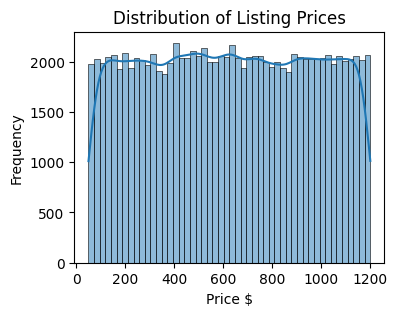

In [22]:
# what is the distribution of listing prices?

plt.figure(figsize=(4,3))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Listing Prices")
plt.xlabel("Price $")
plt.ylabel("Frequency")
plt.show()

In [23]:
# conclution :
# The histogram shows a fairly even distribution of listing prices across different price ranges, indicating no particular concentration of listing in 
# any specific price range. 
# The KDE line helps visualize this even spread more clearly, confirming that the dataset contains listings with a wide variety of prices.

In [24]:
# How are different room types distributed?

df["room type"]

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object

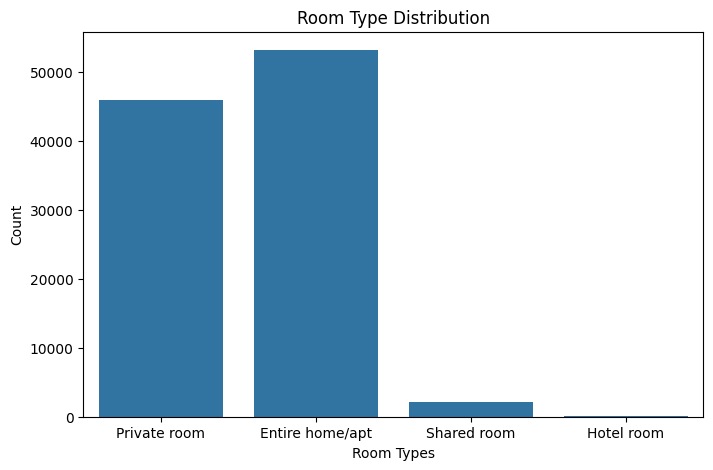

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x="room type", data = df)
plt.title("Room Type Distribution")
plt.xlabel("Room Types")
plt.ylabel("Count")
plt.show()

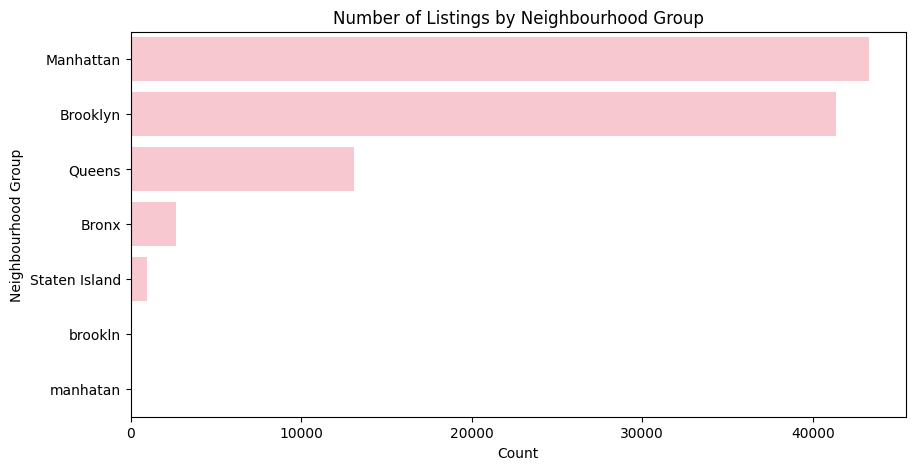

In [26]:
# How are listings distributed across different neighborhoods?

plt.figure(figsize=(10,5))
sns.countplot(y="neighbourhood group", data=df, color="pink", order=df["neighbourhood group"].value_counts().index)
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Count")
plt.ylabel("Neighbourhood Group")
plt.show()

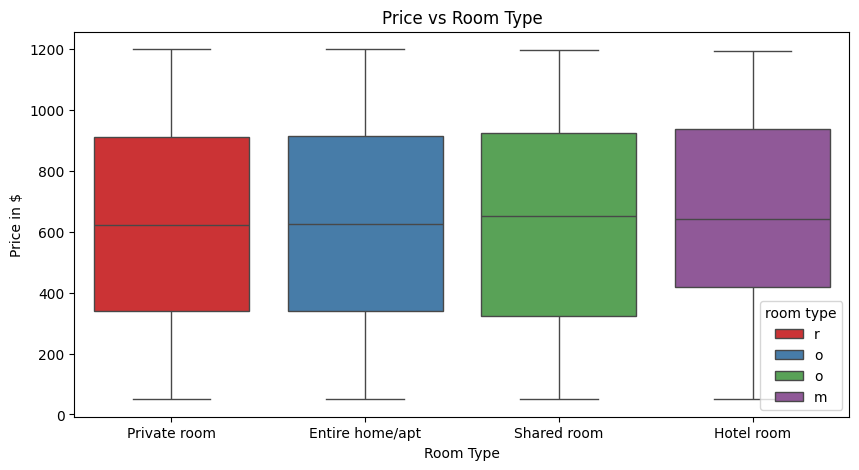

In [27]:
# What is the relationship b/w price and room type

plt.figure(figsize=(10,5))
sns.boxplot(x="room type", y="price", data=df, hue="room type", palette="Set1")
plt.title("Price vs Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price in $")
plt.legend("room type", title="room type")
plt.show()

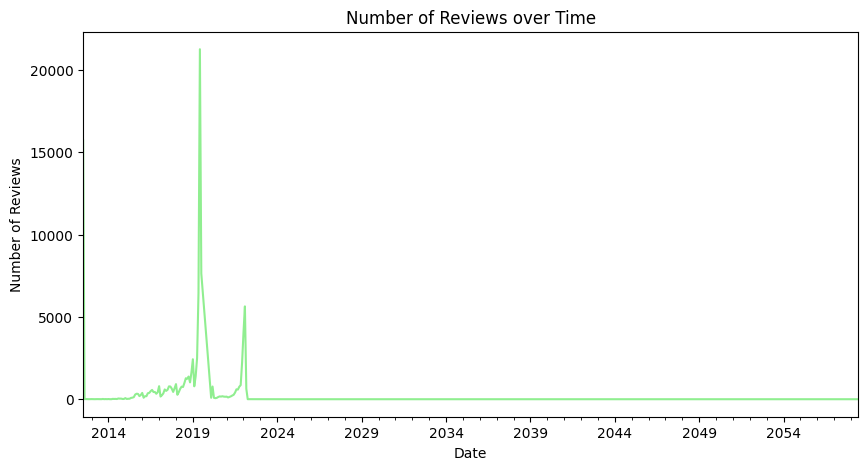

In [28]:
# How has the number of reviews changed over time?

review_over_time = df.groupby(df["last review"].dt.to_period("M")).size()

plt.figure(figsize=(10,5))
review_over_time.plot(kind="line", color="lightgreen")
plt.title("Number of Reviews over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()